# Assignment 1A  
Markus sverdvik heiervang - markuhei  
***  

## Part 1  - Conditional frequency distributions

In [1]:
import nltk
from nltk.corpus import brown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# If installed, seaborn will make a prettier theme for the plots
try:
    import seaborn as sns
    sns.set()
except ImportError:
    print("Using default matplotlib theme")

### a  
Conduct a similar experiment as the one mentioned above with the genres: news, religion,
government, fiction, romance as conditions, and occurrences of the words: he, she, her, him,
as events. Make a table of the conditional frequencies and deliver code and table.
(Hint: Have you considered case folding?)

In [3]:
genres = ["news", "religion", "government", "romance", "fiction"]
terms = ["he", "him", "she", "her"]

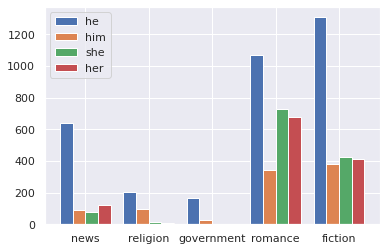

In [4]:
n = len(genres)
x_pos = np.arange(n)

tfs = {t : {g : 0 for g in genres} for t in terms}
for genre in genres:
    text = brown.words(categories=genre)
    fdist = nltk.FreqDist(w.lower() for w in text)
    for t in terms:
        tfs[t][genre] = fdist[t]
bar_width = 0.20
for i, t in enumerate(terms):
    plt.bar(x_pos + (i-1.5)*bar_width, tfs[t].values(), bar_width, label=t)
    
plt.legend()
plt.xticks(x_pos, genres)
None

In [5]:
pd.DataFrame.from_dict(tfs)

he  him  she  her
news         642   93   77  121
religion     206   94   12    8
government   169   26    1    3
romance     1068  340  728  680
fiction     1308  382  425  413

## b  
<i>Answer in words what you see. How does gender vary with the genres?</i>

***  

Pronouns are more common in romance and fiction compared to that of government and religion.

"He" seems to be the most frequent term of the four we're looking at. It is interesting to see the contrast between the relationship of "he" and "him" compared to "she" and "her". For instance, in fiction and romance, "he" is by far the most frequent word, though him is the least frequent in the two. This might reflect who appears as subjects and objects in the sentences.

### C  
... First, consider the complete Brown corpus. Construct a conditional frequency distribution,
which uses gender as condition, and for each gender counts the occurrences of nominative
forms (he, she) and objective forms (him, her). Report the results in a two by two table. Then
calculate the relative frequency of her from she or her, and compare to the relative
frequency of him from he or him. Report the numbers. Submit table, numbers and code you
used.

In [6]:
conds = {
    "male": ("he", "him"),
    "female": ("she", "her")
}

nom = "he", "she"

cfd_c = nltk.ConditionalFreqDist(
   (gender, "nom" if w in nom else "obj") 
   for w in brown.words() for gender, pronouns in conds.items() if w in pronouns
)

In [7]:
cfd_c.tabulate()

        nom  obj 
female 1949 2885 
  male 6566 2576 


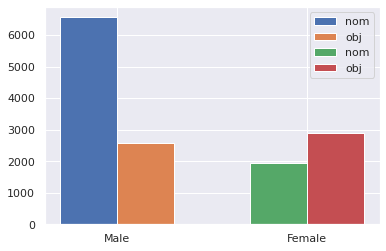

In [8]:
barwidth = 0.30
for i, (gender, dist) in enumerate(cfd_c.items()):
    for j, (term, freq) in enumerate(dist.items()):
        plt.bar([barwidth*j + i-0.15], [freq], barwidth, label=term)
plt.xticks([0, 1], ["Male", "Female"])
plt.legend()
None

### d   
... What could work is to use a tagged corpus, which separates between the two forms of her,
i.e, if the corpus tags her as a personal pronoun differently from her as a possessive pronoun.
The tagged Brown corpus with the full tag set does that. Use this to count the occurrences of
she, he, her, him as personal pronouns and her, his, hers as possessive pronouns. See NLTK
book, Ch. 5, Sec. 2, for the tagged Brown corpus. Report in a two-ways table. 

In [9]:
pronouns = {"him", "his", "her", "hers"}
cfd_d = nltk.ConditionalFreqDist(t for t in brown.tagged_words() if t[0] in pronouns)
cfd_d.tabulate()

        NIL    PP$   PP$$ PP$-NC PP$-TL    PPO PPO-NC 
 her      0   1775      0      4      0   1106      0 
hers      0      0     16      0      0      0      0 
 him      0      0      0      0      0   2572      4 
 his      2   6418     36      8      2      0      0 


In [10]:
for i in cfd_d: print(i, "|", *cfd_d[i])

his | PP$ PP$$ NIL PP$-NC PP$-TL
him | PPO PPO-NC
her | PP$ PPO PP$-NC
hers | PP$$


### e 

We can now correct the numbers from point (b) above. How large percentage of the
feminine personal pronoun occurs in nominative form and in objective form? What are the
comparable percentages for the masculine personal pronoun? 

In [11]:
total = sum(cfd_d["her"].values())

get_percent = lambda n: f"{round(n*100, 1)}%"

her_po = cfd_d["her"]["PP$"]
her_pe = cfd_d["her"]["PPO"]
print(f"Her as posessive: {get_percent(her_po/total)}, as personal: {get_percent(her_pe/total)}")

Her as posessive: 61.5%, as personal: 38.3%


In [12]:
for pronoun in ["him", "his"]:
    sigma = sum(cfd_d[pronoun].values())
    print(pronoun)
    for tag, count in cfd_d[pronoun].items():
        print(tag, get_percent(count/sigma))

him
PPO 99.8%
PPO-NC 0.2%
his
PP$ 99.3%
PP$$ 0.6%
NIL 0.0%
PP$-NC 0.1%
PP$-TL 0.0%


In [13]:
tags = sorted(set(tag for dist in cfd_d.values() for tag in dist.keys()))
tags

['NIL', 'PP$', 'PP$$', 'PP$-NC', 'PP$-TL', 'PPO', 'PPO-NC']

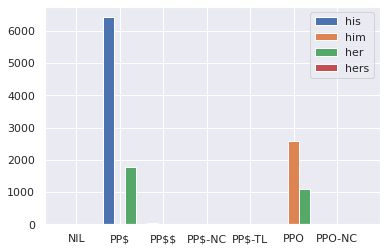

In [14]:
barwidth = 0.25
xtics = np.linspace(0, 6, len(tags))

for i, (pronoun, dist) in enumerate(cfd_d.items()):
    widths = np.array([j+(i-1)*barwidth for j in range(len(tags))])
    freqs = [dist.get(t, 0) for t in tags]
    plt.bar(widths, freqs, barwidth, label=pronoun)
plt.xticks(xtics, [tag.replace("$", r"\$") for tag in tags])
plt.legend()
None

### Looking at the results

What does the data show? The brown corpus was assembled in 1961 and contains various text documents from various categories. In this analysis, we looked at the extent to which the gender pronouns were used and represented in these texts. What have we found? The male pronouns are vastly overrepresented, compared to those of females. That is the case in all of the genres. Why is this? If we consider each category, there might be different reasons.
In religion and history, protagonists and antagonists are usually male, as males historically have been dominating all societal positions of power considering that of females. Many of these authors are also male which might be a factor. Historical oppression of women has also had a significant effect in hindering their precesne in literature. If we create semantic ai-agents based on old values and stereotyping, the agent will adopt this way of though. Creating a semantic vector space based on this corpus will also place things associated with men and women closer to pronouns relating to men and women. Conventional methods of creating word embeddings, or mapping vocabularies to euclidean space, is heavily based on words that appear in another word's context. This will place 'carpenter' closer to male pronouns and nurse closer to female pronouns

# Part 2

### a)

In [15]:
with open("tom_sawyer.txt", "r", encoding="UTF8") as f:
    lines = list(f)
print(*lines[:30])

﻿
 The Project Gutenberg EBook of The Adventures of Tom Sawyer, Complete by
 Mark Twain (Samuel Clemens)
 
 This eBook is for the use of anyone anywhere at no cost and with almost
 no restrictions whatsoever. You may copy it, give it away or re-use
 it under the terms of the Project Gutenberg License included with this
 eBook or online at www.gutenberg.net
 
 Title: The Adventures of Tom Sawyer, Complete
 
 Author: Mark Twain (Samuel Clemens)
 
 Release Date: August 20, 2006 [EBook #74]
 Last Updated: February 23, 2018
 
 Language: English
 
 Character set encoding: UTF-8
 
 *** START OF THIS PROJECT GUTENBERG EBOOK TOM SAWYER ***
 
 Produced by David Widger
 
 
 
 
 
 THE ADVENTURES OF TOM SAWYER
 



### b)  
We turn the text into lowercase as we dont want duplicates of entries in our vocabulary. Both for efficiency, and simplicity.  
We remove all punctuation marks using the translate method. The headers are simply sliced off.

In [16]:
# Task b: remove metadata
import string
doc = "".join(lines[27:]).translate(str.maketrans('', '', string.punctuation)).lower()

### c)

In [17]:
tokens = nltk.tokenize.word_tokenize(doc)

### d)  



In [18]:
tokendist = nltk.FreqDist(tokens)

In [35]:
# 'the' is the most common word
max(tokendist, key=lambda x: tokendist[x])

'the'

### e)

In [19]:
countdist = nltk.FreqDist(tokendist.values())
countdist

FreqDist({1: 4643, 2: 1343, 3: 623, 4: 429, 5: 234, 6: 190, 7: 158, 8: 133, 10: 96, 9: 77, ...})

In [20]:
d = {}
for i in range(1, 11):
    print("words that occur ",i, "times:", countdist[i])
    d[str(i)] = countdist[i]

words that occur  1 times: 4643
words that occur  2 times: 1343
words that occur  3 times: 623
words that occur  4 times: 429
words that occur  5 times: 234
words that occur  6 times: 190
words that occur  7 times: 158
words that occur  8 times: 133
words that occur  9 times: 77
words that occur  10 times: 96


In [21]:
mid = sum(v for k, v in countdist.items() if 11 < k < 50)
d["11 < x < 50"] = mid
f"{mid} terms between 11 and 50 occurences"

'448 terms between 11 and 50 occurences'

In [22]:
top = sum(v for k, v in countdist.items() if k > 100)
d["x > 100"] = top
f"{top} terms occur more than 100 times"

'101 terms occur more than 100 times'

In [26]:
pd.DataFrame(d.items(), columns=["term occurence", "count"])

term occurence  count
0               1   4643
1               2   1343
2               3    623
3               4    429
4               5    234
5               6    190
6               7    158
7               8    133
8               9     77
9              10     96
10    11 < x < 50    448
11        x > 100    101

### f)

In [36]:
counts = sorted(tokendist.values(), key=lambda a: -a)
counts
pd.DataFrame(list(zip(counts[:20], [i * counts[i-1] for i in range(1, 21)])), columns=["n", "r * n"])

n  r * n
0   3921   3921
1   3082   6164
2   1876   5628
3   1793   7172
4   1577   7885
5   1545   9270
6   1538  10766
7   1182   9456
8   1169  10521
9   1127  11270
10  1004  11044
11   905  10860
12   827  10751
13   819  11466
14   746  11190
15   702  11232
16   688  11696
17   551   9918
18   546  10374
19   533  10660

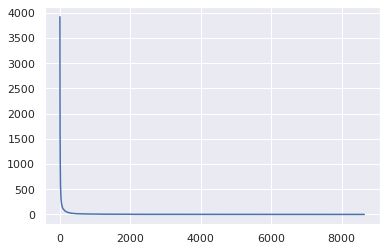

In [37]:
plt.plot(counts)

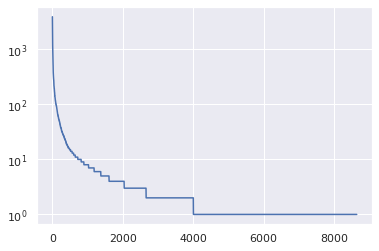

In [41]:
plt.plot(counts)
plt.yscale("log")
# plt.xscale("log")

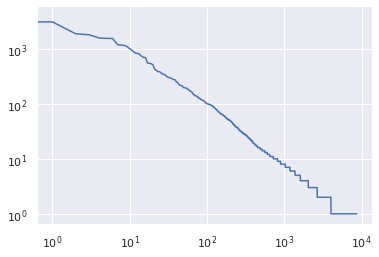

In [42]:
plt.plot(counts)
plt.yscale("log")
plt.xscale("log")